## Question 1:

### Parking Lot problem

Parking is the main problem for different big venues and offices. 

Here we have created a model where:
1. We have n number of leves/floors
2. We have different parking slots with each lane has fixed size of 10 slots for every floor.
3. The createFloor function create the parking lot for nth floor.
4. The availableEmptySlot function gives if there is any slot empty in that floor.
5. The addVehicleForCompany function will tag the vehicle for the particular company.
6. The parkVehicle function will park the vehicle in vacant slot
7. The leaveParking function will exit the vehicle and update the parking lots details.
8. The companyParked function will provide details of what vehicles are parked for a particular company.

### Class Diagram:

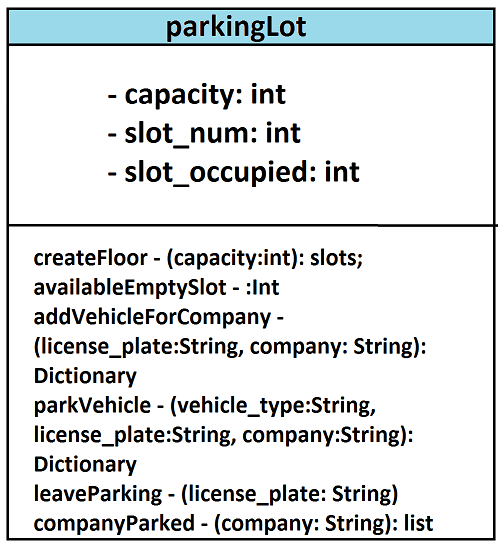

### Work flow diagram

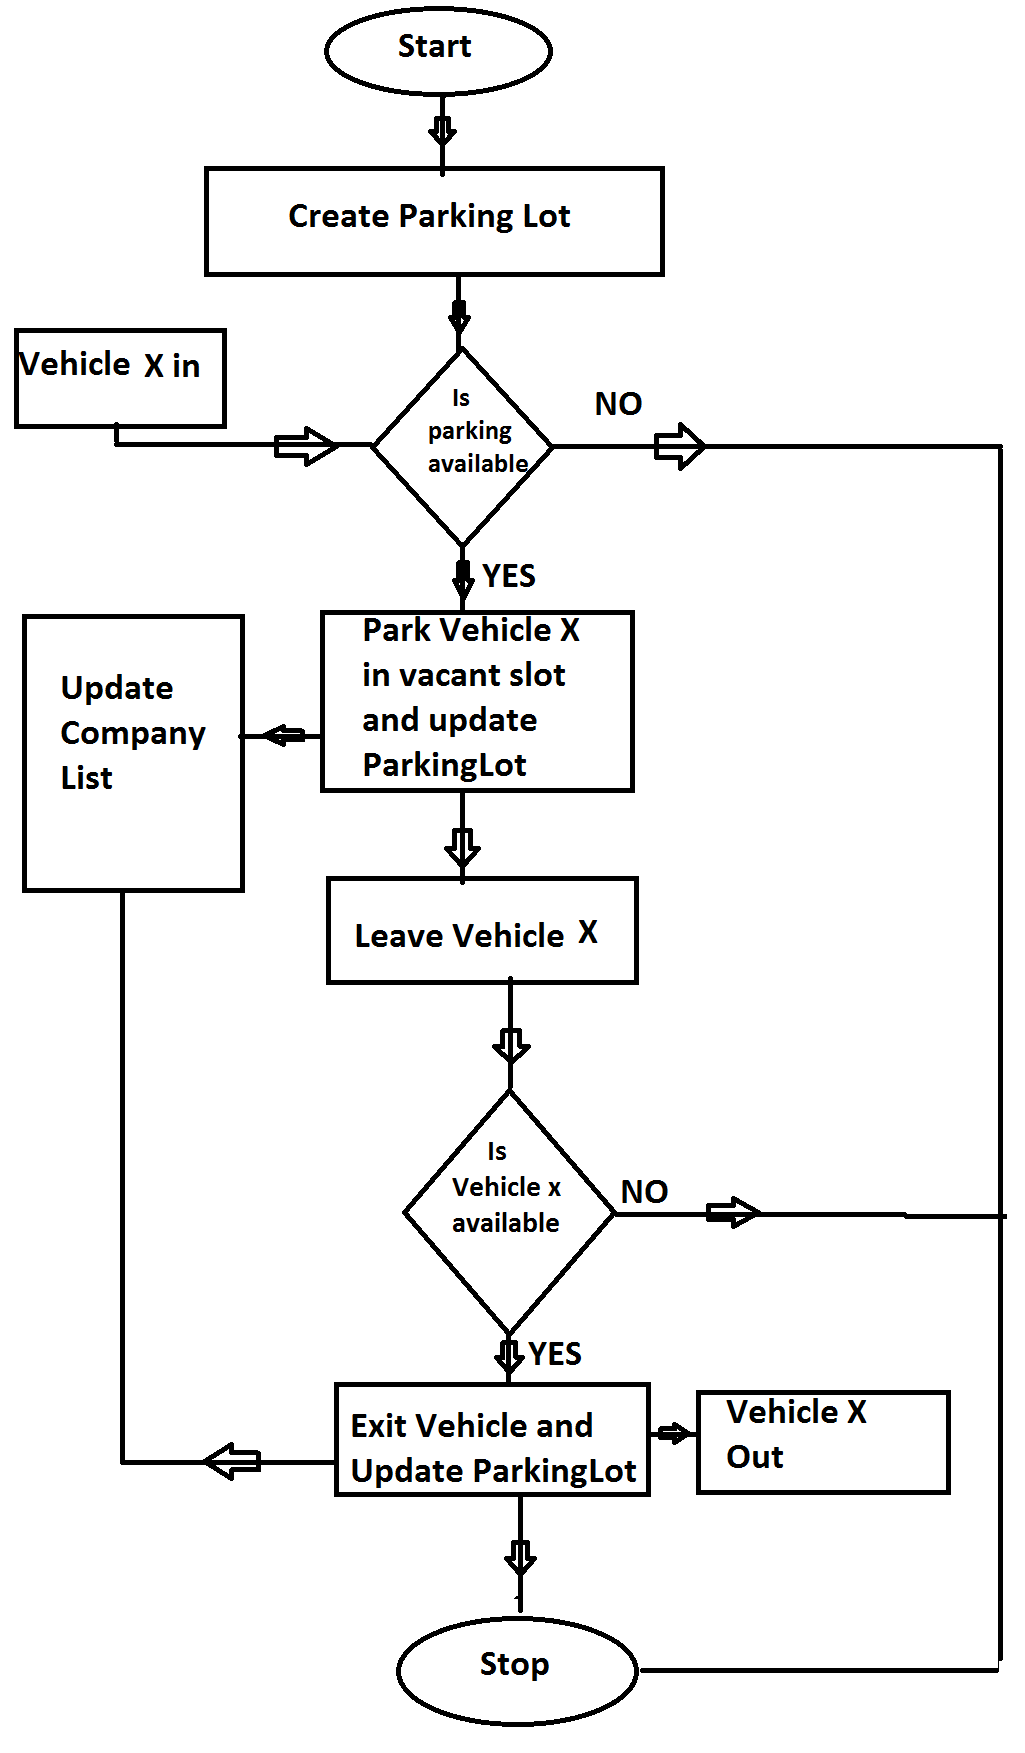

### Code

In [18]:
import Vehicle as V
class parkingLot:
    def __init__(self):
        self.capacity = 0
        self.slot_num = 0
        self.slots_occupied = 0
        
    def createFloor(self, capacity):
        if capacity%10 == 0:
            self.lane_num = (capacity//10)
            self.slots = [[-1]*10 for i in range(1,self.lane_num+1)]
        else:
            self.lane_num = (capacity//10)+1
            z=10-(capacity%10)
            self.slots = [[-1]*10 for i in range(1,self.lane_num+1)]
            self.slots[self.lane_num-1][10-z:10]=[-2]*z
        self.capacity = capacity
        return self.slots
    
    def availableEmptySlot(self):
        self.lane_num = len(self.slots)
        for l in range(self.lane_num):
            for s in range(10):
                if self.slots[l][s] == -1:
                    return l,s 
                elif self.slots[l][s] == -2:
                    return -2,0
            
    def addVehicleForCompany(self, license_plate, company, vehicle_c = {}):
        if company not in vehicle_c.keys():
            vehicle_c[company] =[]
        for i in range(self.lane_num):
            for j in range(10):
                if self.slots[i][j]==-1 or self.slots[i][j]==-2:
                    continue
                if (self.slots[i][j].company == company and license_plate not in vehicle_c[company]):
                    vehicle_c[company].append(license_plate)
        return vehicle_c
    
    def parkVehicle(self, vehicle_type, license_plate, company):
        self.vehicle_per_company = {}
        if self.slots_occupied < self.capacity:
            l,s = self.availableEmptySlot()
            if l == -2:
                return ('Sorry no parking available')
            else:
                self.slots[l][s] = V.vehicle(vehicle_type, license_plate, company)
                
                self.vehicle_per_company = self.addVehicleForCompany(license_plate, company)
                self.slot_num = self.slot_num+1
                self.slots_occupied = self.slots_occupied+1
                return self.vehicle_per_company
        else:
            return -2
        
    def leaveParking(self, license_plate):
        if self.slots_occupied>0:
            for i in range(self.lane_num):
                for j in range(10):
                    if self.slots[i][j]==-1 or self.slots[i][j]==-2:
                        continue
                    else:
                        if self.slots[i][j].license_plate == license_plate:
                            self.vehicle_per_company[self.slots[i][j].company].remove(license_plate)
                            self.slots[i][j]=-1
                            self.slots_occupied = self.slots_occupied - 1
                            print('Vehicle Exited')
        else: 
            return ('Parking is vaccant. No vehicle Found')
        
    def companyParked(self, company):
        if self.slots_occupied>0:
            for i in range(self.lane_num):
                for j in range(10):
                    if self.slots[i][j]==-1 or self.slots[i][j]==-2:
                        continue
                    else:
                        return list(self.vehicle_per_company[company])

In [19]:
slots_list = []
num_of_levels = int(input('Enter the number of levels: '))
for i in range(num_of_levels):
    num_of_slots_per_level = int(input('Enter the number of slots per level: '))
    slots_list.append(num_of_slots_per_level)

parking_lot = {}
for i in range(num_of_levels):
    x=parkingLot()
    parking_lot[i] = x
    parking_lot[i].createFloor(slots_list[i])


Enter the number of levels: 3
Enter the number of slots per level: 12
Enter the number of slots per level: 12
Enter the number of slots per level: 12


In [20]:
parking_lot[2].parkVehicle('car' , 'KA-01-HH-1234' , 'com_A')
parking_lot[0].parkVehicle('car' , 'MP-01-HH-2701' , 'com_A')
parking_lot[1].parkVehicle('car' , 'UP-01-HH-9999' , 'com_B')
parking_lot[2].parkVehicle('bike', 'MH-01-BB-0001' , 'com_B')
parking_lot[1].parkVehicle('bike', 'BR-01-HH-7777' , 'com_c')
parking_lot[0].parkVehicle('auto', 'KA-01-HH-3141' , 'com_c')
parking_lot[2].parkVehicle('auto', 'KA-01-HH-3151' , 'com_c')
parking_lot[1].parkVehicle('auto', 'KA-01-HH-3179' , 'com_c')
parking_lot[1].parkVehicle('auto', 'KA-01-HH-3305' , 'com_c')
parking_lot[1].parkVehicle('car' , 'KA-01-HH-1254' , 'com_A')
parking_lot[2].parkVehicle('car' , 'MP-01-HH-2741' , 'com_A')
parking_lot[2].parkVehicle('car' , 'UP-01-HH-9009' , 'com_B')
parking_lot[0].parkVehicle('bike', 'MH-01-BB-1001' , 'com_B')
parking_lot[2].parkVehicle('bike', 'BR-01-HH-7887' , 'com_c')
parking_lot[1].parkVehicle('auto', 'KA-01-HH-3111' , 'com_c')
parking_lot[0].parkVehicle('auto', 'KA-01-HH-3121' , 'com_c')
parking_lot[1].parkVehicle('auto', 'KA-01-HH-3409' , 'com_c')
parking_lot[2].parkVehicle('auto', 'KA-01-HH-3301' , 'com_c')
parking_lot[0].parkVehicle('car' , 'KA-01-HH-1294' , 'com_A')
parking_lot[1].parkVehicle('car' , 'MP-01-HH-2791' , 'com_A')
parking_lot[2].parkVehicle('car' , 'UP-01-HH-9909' , 'com_B')
parking_lot[0].parkVehicle('bike', 'MH-01-BB-2001' , 'com_B')
parking_lot[0].parkVehicle('bike', 'BR-01-HH-7387' , 'com_c')
parking_lot[1].parkVehicle('auto', 'KA-01-HH-3131' , 'com_c')
parking_lot[2].parkVehicle('auto', 'KA-01-HH-3101' , 'com_c')
parking_lot[0].parkVehicle('auto', 'KA-01-HH-3049' , 'com_c')
parking_lot[1].parkVehicle('auto', 'KA-01-HH-3785' , 'com_c')


{'com_A': ['KA-01-HH-1234',
  'MP-01-HH-2701',
  'KA-01-HH-1254',
  'MP-01-HH-2741',
  'KA-01-HH-1294',
  'MP-01-HH-2791'],
 'com_B': ['UP-01-HH-9999',
  'MH-01-BB-0001',
  'UP-01-HH-9009',
  'MH-01-BB-1001',
  'UP-01-HH-9909',
  'MH-01-BB-2001'],
 'com_c': ['BR-01-HH-7777',
  'KA-01-HH-3141',
  'KA-01-HH-3151',
  'KA-01-HH-3179',
  'KA-01-HH-3305',
  'BR-01-HH-7887',
  'KA-01-HH-3111',
  'KA-01-HH-3121',
  'KA-01-HH-3409',
  'KA-01-HH-3301',
  'BR-01-HH-7387',
  'KA-01-HH-3131',
  'KA-01-HH-3101',
  'KA-01-HH-3049',
  'KA-01-HH-3785']}

In [21]:
for i in range(num_of_levels):
    for c in ['com_A', 'com_B', 'com_c']:
        print('Vehicles of company {0} in parking {1}'.format(c,i))
        print(parking_lot[i].companyParked(c))
        print('----------------------------------------------------------------------------------------')

Vehicles of company com_A in parking 0
['KA-01-HH-1234', 'MP-01-HH-2701', 'KA-01-HH-1254', 'MP-01-HH-2741', 'KA-01-HH-1294', 'MP-01-HH-2791']
----------------------------------------------------------------------------------------
Vehicles of company com_B in parking 0
['UP-01-HH-9999', 'MH-01-BB-0001', 'UP-01-HH-9009', 'MH-01-BB-1001', 'UP-01-HH-9909', 'MH-01-BB-2001']
----------------------------------------------------------------------------------------
Vehicles of company com_c in parking 0
['BR-01-HH-7777', 'KA-01-HH-3141', 'KA-01-HH-3151', 'KA-01-HH-3179', 'KA-01-HH-3305', 'BR-01-HH-7887', 'KA-01-HH-3111', 'KA-01-HH-3121', 'KA-01-HH-3409', 'KA-01-HH-3301', 'BR-01-HH-7387', 'KA-01-HH-3131', 'KA-01-HH-3101', 'KA-01-HH-3049', 'KA-01-HH-3785']
----------------------------------------------------------------------------------------
Vehicles of company com_A in parking 1
['KA-01-HH-1234', 'MP-01-HH-2701', 'KA-01-HH-1254', 'MP-01-HH-2741', 'KA-01-HH-1294', 'MP-01-HH-2791']
------------

In [22]:
Vehicle_Leave = input('Exit vehicle - Enter Licesne Plate Number: ')
for i in range(num_of_levels):
    if Vehicle_Leave in list(parking_lot[i].companyParked('com_c')):
        parking_lot[i].leaveParking(Vehicle_Leave)

Exit vehicle - Enter Licesne Plate Number: BR-01-HH-7387
Vehicle Exited


In [23]:
parking_lot[2].companyParked('com_c')

['BR-01-HH-7777',
 'KA-01-HH-3141',
 'KA-01-HH-3151',
 'KA-01-HH-3179',
 'KA-01-HH-3305',
 'BR-01-HH-7887',
 'KA-01-HH-3111',
 'KA-01-HH-3121',
 'KA-01-HH-3409',
 'KA-01-HH-3301',
 'KA-01-HH-3131',
 'KA-01-HH-3101',
 'KA-01-HH-3049',
 'KA-01-HH-3785']


## Question: 2

### Permutation Problem

For each test case, print all permutations of a given string S with single space and all
permutations should be in lexicographically increasing order.

In [198]:
from itertools import permutations 
  
def permutationString(s): 
    z=[''.join(chars) for chars in permutations(s)]
    val = sorted(z) 
    for i in val: 
        print(i)

In [204]:
num_of_test_cases = int(input('Enter number of test cases'))
s=[]
for i in range(num_of_test_cases):
    a=input('Enter {0} test case string: '.format(i))
    s.append(a.upper())

for word in s:
    print('All permutations of a {0}'.format(word))
    permutationString(word)
    


Enter number of test cases2
Enter 0 test case string: abc
Enter 1 test case string: def
All permutations of a ABC
ABC
ACB
BAC
BCA
CAB
CBA
All permutations of a DEF
DEF
DFE
EDF
EFD
FDE
FED
